# Introduction

In this notebook, we will provide information about key concepts in Machine Learning as well as discuss some of the most useful tools for predictive data analysis in Python.

## Table of Content

- [0. Packages](#0)
- [1. Scikit Learn](#1)
    - [1.1 Alternatives](#1-1)
- [2. Supervised Learning](#2)
    - [2.1 Classification](#2-1)
        - [Jupyter Notebook Widgets (Data Visualisation)](#2-1-1)
        - [Preprocessing](#2-1-2)
        - [Classify Digits](#2-1-3)
        - [Categorical Variables Encoding](#2-1-4)
    - [2.2 Regression](#2-2)
        - [Other Linear Regression Models](#2-2-1)
        - [Making Predictions](#2-2-2)
- [3.Unsupervised Learning](#3)
    - [3.2 Clustering](#3-1)
    - [3.1 PCA](#3-2)

# 0. Packages <a name="0"></a>

In this session, we will make use of the following packages:
- [numpy](https://docs.scipy.org/doc/numpy/) is a popular library for scientific computing.
- [matplotlib](https://matplotlib.org/3.1.1/contents.html) is a plotting library compatible with numpy.
- [pandas](https://pandas.pydata.org/docs/) is what we'll use to manipulate our data.
- [sklearn](https://scikit-learn.org/stable/index.html) will be used to measure the performance of our model.

Run the next cell to import the necessary packages mentioned before. Besides, we will add more packages as needed while progressing in this session.

In [1]:
# Good practice to use short but clear aliases for the imported libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
# Set a seed
np.random.seed(2020)
# Magic Function
%matplotlib inline
# Hide all warnings
import warnings
warnings.filterwarnings('ignore') # warnings.filterwarnings(action='once')

# 1. Scikit-learn <a name="1"></a>

Scikit-learn is one of the most popular libraries for ML and predictive data analysis in python. Scikit-learn was built on top of other popular libraries such as NumPy, SciPy and matplotlib [1].

Some of the benefits of using Scikit-learn:
- Simple and consistent API
- It covers most of the machine learning tasks
- Great documentation
- You can finetune many parameters and still have good default values
- Efficient models
- Open source and commercially usable


According to the creators of Scikit-learn:

> Often the hardest part of solving a machine learning problem can be finding the right estimator (algorithm or model) for the job. Different estimators are better suited for different types of data and different problems. The flowchart below is designed to give users a bit of a rough guide on how to approach problems concerning which estimators to try on your data [2].

In the official scikit-learn documentation, a useful map showing the landscape of machine learning is provided [2].
![ml map](https://scikit-learn.org/stable/_static/ml_map.png)

Sources: 
- 1. [Scikit-learn official website](https://scikit-learn.org/stable/)
- 2. [Machine Learning Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


# 1.1 Alternatives <a name="1-1"></a>


Scikit-learn is one of the most popular ML libraries in Python that provide out-of-the-box implementations of the most popular ML algorithms. However, given some circumstances, you might find want to use other libraries or complement your pipelines with other ML libraries.

Other popular ML libraries in Python are:

**SciPy library:**
> The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines, such as routines for numerical integration, interpolation, optimization, linear algebra, and statistics.

Source: [SciPy](https://www.scipy.org/)

**RAPIDS:**

> The RAPIDS data science framework includes a collection of libraries for executing end-to-end data science pipelines completely in the GPU. It is designed to have a familiar look and feel to data scientists working in Python.
RAPIDS uses optimized NVIDIA CUDA® primitives and high-bandwidth GPU memory to accelerate data preparation and machine learning. The goal of RAPIDS is not only to accelerate the individual parts of the typical data science workflow, but to accelerate the complete end-to-end workflow.

One of the current limitations of the Scikit-learn library is that it is implemented to be used in CPU. This might be ok for many use cases, however, as more complicated and larger you get the longer will take to train the ML algorithms.

RAPIDS has a specific module for ML (cuML) in GPU which accelerates the performance significantly compared with CPU-based implementation libraries such as Scikit-learn.

> cuML is a suite of fast, GPU-accelerated machine learning algorithms designed for data science and analytical tasks. Our API mirrors Sklearn’s, and we provide practitioners with the easy fit-predict-transform paradigm without ever having to program on a GPU.

Source: [RAPIDS](https://rapids.ai/start.html)


**PyTorch/Tensorflow**

Deep learning can use more complex data, but needs more data. This approaches typically use deep learning frame works like PyTorch which we will use in the next course. 

# 2. Supervised Learning <a name="2"></a>

Supervised learning is the machine learning (ML) task of learning a function that maps an input to an output based on example input-output pairs [3]. It infers a function from labelled training data consisting of a set of training examples [4].

Consider the example below, where we have a classification problem. The MNIST dataset uses images corresponding to handwritten digits from 0 to 9 for a total of 10 different classes. Suppose that we already have a trained model. 

![ML](ml2.png)

In the example above, the image represents the digit 1 which is passed to the Machine Learning classifier, then the output generates an array with 10 positions (every position represents a class), being the class 0 and 9, the first and last position of the array. So we can define the ML classifier as a function that is going to map the input (in our case an image of the digit 1), to a set of probabilities (values ranging from 0 to 1) for the 10 different classes.

In our example, $p(1|x, \theta)$ = 0.84. In ML is common to use the <code>argmax()</code> function to get the position of the array with the maximum probability. This index would correspond to the most likely label. If we apply <code>argmax()</code> to the output array, we will get the value 1 in return given that 0.84 is the maximum probability value.

To train an ML algorithm, we have to modify the internal learnable parameters $\theta$. Those values will allow the algorithm to map correctly its input to the desired output.

In the supervised learning approach, we need to provide many examples of inputs with their correspondent label or class to the algorithm for the training phase. In the image below, we can observe a representation of this process.

![ML](ml1.png)

In this iterative process, a loss or cost function is used to measure the distance between the real label and the prediction. The aim of the training process is then to get a closer distance between the prediction and real label on unseen images. 


Find more information about the Supervised Learning algorithms available in scikit-learn [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

Sources:
- [Wikipedia](https://en.wikipedia.org/wiki/Supervised_learning#:~:text=Supervised%20learning%20is%20the%20machine,a%20set%20of%20training%20examples.)
-  3. Stuart J. Russell, Peter Norvig (2010) Artificial Intelligence: A Modern Approach, Third Edition, Prentice Hall ISBN 9780136042594.
-  4. Mehryar Mohri, Afshin Rostamizadeh, Ameet Talwalkar (2012) Foundations of Machine Learning, The MIT Press ISBN 9780262018258.

Consider the example below where we have the ground truth label `y` and 3 predictions made by different machine learning algorithm. We will determine what is the best prediction using `Mean Absolute Error` (MAE).

*Note:* `MAE` is not usually used for classification problems. Instead, there are better metrics for classification that will be discussed in the next session. However, `MAE` is one of the simplest error functions.

In [2]:
y = np.array([0,0,0,0,1,0,0,0,0,0])

print('Correct Answer:', y.argmax())

pred_1 = np.array([0,0,0,0,0,0,0,0,0,1])
pred_2 = np.array([0.01,0,0,0,0.89,0,0,0,0,0.1]) 
pred_3 = np.array([0,0,0,0,0.95,0,0,0,0,0.05]) 

error1 = np.abs(y-pred_1).mean()
error2 = np.abs(y-pred_2).mean()
error3 = np.abs(y-pred_3).mean()

print(error1, error2, error3)

Correct Answer: 4
0.2 0.022 0.010000000000000005


 <div class="alert alert-success">
  <h2>Exercise 1</h2>

  Description:
  
  1. Given `y` calculate the error using `Mean Absolute Error` (MAE) for every prediction.
    
  ```python
    y = np.array([0.35,0.05,0.05,0,0,0,0.55,0,0,0]) 
    pred_1 = np.array([0.75,0,0,0,0,0,0,0.2,0,0.05])
    pred_2 = np.array([0.01,0,0,0,0.89,0,0,0,0,0.1]) 
    pred_3 = np.array([0,0,0,0,0,0,0,0.95,0,0.05]) 
  ```
    
  2. Another popular error or loss function is `Mean Square Error` or `MSE`. Calculate `MSE` for every prediction using `np.square` instead of `np.abs`

  <details>
  <summary><b>→ Hints</b></summary>
  - Use `np.abs` and `.mean()` to calculate the `Mean Absolute Error`.
  - To calculate `Mean Squared Error` use `np.square(y-pred).mean()`
  </details>

  <br/>
  <br/>
  <details>
  <summary>
    <b>→ Solution</b>
  </summary>

  Mean Absolute Error:
  ```python
    error1 = np.abs(y-pred_1).mean()
    error2 = np.abs(y-pred_2).mean()
    error3 = np.abs(y-pred_3).mean()

    print(error1, error2, error3)
  ```
      
  Mean Absolute Error:
  ```python
    error1 = np.square(y-pred_1).mean()
    error2 = np.square(y-pred_2).mean()
    error3 = np.square(y-pred_3).mean()

    print(error1, error2, error3)
  ```

  </details>

  </div>

# 2.1 Classification <a name="2-1"></a>


While regression methods map inputs to a continuous dependent variable from a number of independent variables. In classification problems, the inputs will be mapped to a defined set of classes. There are many ML algorithms for regression and classification.

For this session, we will explore the most basic ML algorithm for binary classification, the <code>Logistic Regression</code>.

> ... the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object detected in the image would be assigned a probability between 0 and 1, with a sum of one.


In the next session, we will explore more complex methods for classification.

## Classifying Images of Digits

Scikit-learn provides some datasets that can be used to test different machine learning techniques. For this example, we will use the Digits dataset provided by Scikit-learn which consists of 1,797 images of 8x8 pixels. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we would have to first transform it into a feature vector with length 64.

Source: [The Digit Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

More information about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)



In [3]:
from sklearn import datasets

# Load the digits dataset
digits = datasets.load_digits()
#  Get keys from dictionary
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

# Let's see the targets

In [4]:
print(digits['target'], len(digits['target']))

[0 1 2 ... 8 9 8] 1797


Target: 4


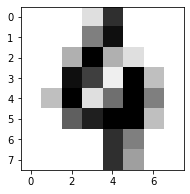

In [5]:
idx = 100
# Let's first see one of the images
plt.figure(1, figsize=(3, 3))
print(f"Target: {digits.target[idx]}")
plt.imshow(digits.images[idx], cmap=plt.cm.gray_r)
plt.show()

<a name="2-1-1"></a>
# Jupyter Notebook Widgets
Let's explore the dataset in a different way using widgets !

In [6]:
from ipywidgets import interact, widgets
from IPython.display import display

fig = plt.figure(figsize=(10, 10))

total_images = digits.target.shape[0]


def f(index):
    print(f"Target: {digits.target[index]}")
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r)
    fig.canvas.draw()
    display(fig)
    plt.show()
    
interact(f, index=widgets.IntSlider(min=0, max=total_images-1))

<Figure size 720x720 with 0 Axes>

interactive(children=(IntSlider(value=0, description='index', max=1796), Output()), _dom_classes=('widget-inte…

<function __main__.f(index)>

<a name="2-1-2"></a>
# Preprocessing

Before training any ML model, we have to prepare the raw data and process it to make it suitable for a machine learning model.

Usually, in the preprocessing step, we have to deal with some problems like:

1. Finding Missing Data and dealing with it
2. Encoding categorical features
3. Splitting the dataset into training and test set.
4. Data Normalisation

In this session and futures ones, we will provide examples of those problems and how to deal with them.


To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, features) matrix:

In [7]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, 64))
y = digits.target

print(digits.images.shape)
print(X.shape)

(1797, 8, 8)
(1797, 64)


We will further divide the dataset into the <code>train</code> and <code>test</code> set. To do that, scikit-learn provides the <code>sklearn.model_selection.train_test_split</code> function.

In ML is important to separate the dataset and have one subset for training only and another one for testing and validation. In order to evaluate the performance of ML algorithms, it is important that we test in unseen data. There are some exceptions to this rule when using much advance evaluation techniques such as cross-validation, but we will talk about it in future sessions.

<a name="2-1-3"></a>
# Train, Predict and Evaluate

In [8]:
from sklearn.linear_model import LogisticRegression
# Let's import the train_test_split function
from sklearn.model_selection import train_test_split

# Create a classifier: a Logistic Regression with All vs Rest multiclass strategy
classifier = LogisticRegression(multi_class="ovr", max_iter=1000, random_state=2020)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit
predicted = classifier.predict(X_test)

# Let's check the accuracy achieved by our model
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, predicted)}")

Accuracy: 0.9221357063403782


We achieved an accuracy of 92% using one of the most basic classification algorithms, the Logistic Regression, for small images. 

**Note:** For more complex images with higher dimensionality is recommended to use Deep Learning techniques such as Convolutional Neural Networks or CNNs.

<a name="2-1-4"></a>
## Encoding Categorical Features

Encoding is a preprocessing step where we convert categorical features to representations that an ML algorithm can process.

There are two popular types of encoding:

- One Hot Encoding: [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) is a utility function in scikit-learn that helps to encode categorical features as a one-hot numeric array.
- Integer/Ordinal Encoding:
    In this type of encoding we will map a label or class to an integer representation. Scikit-learn provides two functions to do this. <code>[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)</code> and <code>[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)</code>.
    


## One Hot Encoding

For this example, imagine that you have an output sequence of the following 3 labels:

- "bronze"
- "silver"
- "gold"

This sequence might be represented using an integer representation using `LabelEncoder` from scikit-learn. Using integer encoding the labels might have this representations:

- "bronze" -> 1
- "silver" -> 2
- "gold"   -> 3

One-hot encoding uses binary vectors instead to represent the labels. 

The example below shows an intuitive one-hot representation for the labels where `1` represents the presence of the label and `0` the abscence of it.

- "bronze" -> [1,0,0]
- "silver" -> [0,1,0]
- "gold"   -> [0,0,1]

We are currently using 3-length vectors to represent the labels. However, there are more efficient ways of representing the same data using different representations. For example, consider the one-hot prepresentations below:

- "bronze" -> [0,0]
- "silver" -> [1,0]
- "gold"   -> [0,1]

If we had one more label we could use [1,1] to represent it. This is the main idea behind the one-hot encoding process. You could create your own code to create these representations, however, there are different variations and in some cases it might be easier to use `OneHotEncoder` from scikit-learn, which handles special cases.



Consider the example below which encodes two variables (two cagegorical and three numerical) into a single one-hot representation using `OneHotEncoder` in scikit-learn:

In [9]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder will ignore classes that were not seen during fit
enc = OneHotEncoder(handle_unknown="ignore")

X = [["bronze"], ["silver"], ["gold"]]
# Learn Categories from seen data
enc.fit(X)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

Now let's see what categories were learnt by the encoder

In [10]:
enc.categories_

[array(['bronze', 'gold', 'silver'], dtype=object)]

In [11]:
# Transform Cagegorical values to one-hot encoding
enc.transform([["silver"], ["gold"], ["bronze"],["bronze"]]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
# You can reverse the operation as well
enc.inverse_transform([[0, 1, 0], [1.0, 0.0, 0.0]])

array([['gold'],
       ['bronze']], dtype=object)

Now let's try with two encoded categorical values

In [13]:
# Data
X_2 = [["bronze","archery"],["bronze","weightlifting"],["silver","fencing"],["gold","table tennis"]]
enc_2 = OneHotEncoder(handle_unknown="ignore")
enc_2.fit(X_2)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [14]:
enc_2.get_feature_names(["medal", "sport"])

array(['medal_bronze', 'medal_gold', 'medal_silver', 'sport_archery',
       'sport_fencing', 'sport_table tennis', 'sport_weightlifting'],
      dtype=object)

<a name="ex-2"></a>
<div class="alert alert-success">
  <h2>Exercise 2</h2>

Have a look at the result of the one-hot encoding in the example below.

1. Analyse the one-hot encoding results and compare it with input. Can you spot any pattern?
2. Change the values of the input with valid data and try to determine if there is any pattern.
</div>



In [15]:
test = ["silver", "archery"], ["gold", "archery"], ["gold", "fencing"], ["bronze","fencing"]
enc_2.transform(test).toarray()

array([[0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0.]])

One can always drop the first column for each feature:

In [16]:
drop_enc = OneHotEncoder(drop='first').fit(X_2)
drop_enc.categories_

[array(['bronze', 'gold', 'silver'], dtype=object),
 array(['archery', 'fencing', 'table tennis', 'weightlifting'],
       dtype=object)]

<a name="ex-3"></a>
<div class="alert alert-success">
  <h2>Exercise 3</h2>

  - Now that we dropped the first column, analyse how the encoding `drop_enc` changed compared to the first one-hot encoding.
</div>


In [17]:
test

(['silver', 'archery'],
 ['gold', 'archery'],
 ['gold', 'fencing'],
 ['bronze', 'fencing'])

In [18]:
drop_enc.transform(test).toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

## Label Encoding

Example:

In [19]:
le = preprocessing.LabelEncoder()
le.fit(["apples", "blueberries", "pineapple", "apples", "apples", "coconut"])

LabelEncoder()

In [20]:
print(le.classes_)
print(le.transform(["coconut", "apples", "apples", "blueberries"]))

['apples' 'blueberries' 'coconut' 'pineapple']
[2 0 0 1]


In [21]:
# Create a random list with 10 elements in the range from 0 to 4
data_example = np.random.randint(0, 4, 10)
print(data_example)

[0 0 3 2 3 3 1 3 3 0]


In [22]:
le.inverse_transform(data_example)

array(['apples', 'apples', 'pineapple', 'coconut', 'pineapple',
       'pineapple', 'blueberries', 'pineapple', 'pineapple', 'apples'],
      dtype='<U11')

# 2.2 Regression <a name="2-2"></a>


According to Wikipedia:

> In statistical modelling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome variable') and one or more independent variables (often called 'predictors', 'covariates', or 'features'). The most common form of regression analysis is linear regression, in which a researcher finds the line (or a more complex linear combination) that most closely fits the data according to a specific mathematical criterion.

> Most regression models propose that $Y_{i}$ is a function of $X_{i}$ and $\beta$ , with $e_{i}$ representing an additive error term that may stand in for un-modelled determinants of $Y_{i}$ or random statistical noise:
    $Y_{i}=f(X_{i},\beta )+e_{i}$
 
 
**Linear regression:** It is one of the most basic regression methods. <code>LinearRegression</code> fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
$\min_{w} || X w - y||_2^2$

Formula: $ f\left(x\right)=mx+b  $
 
Sources:
- [Regression Analysis](https://en.wikipedia.org/wiki/Regression_analysis)


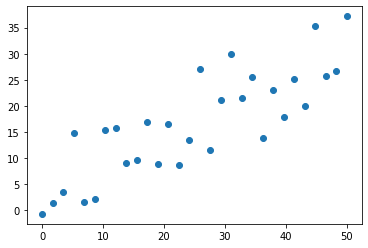

In [23]:
# Generate 30 random numbers
x = np.linspace(0, 50, 30)
# Random Delta
delta = np.random.uniform(-10, 10, x.size)
y = 0.5 * x + 5 + delta

plt.scatter(x, y)

In [24]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
# Fit data
reg.fit(x.reshape(-1, 1), y.reshape(-1, 1))
# Check Regression coefficients and intercept
m = reg.coef_[0][0]
b = reg.intercept_[0]
print(f"m:{m} b:{b}")

m:0.5493028498665223 b:2.888865985554304


Let's plot the line that minimise the distance to the points

Text(0, 0.5, 'output')

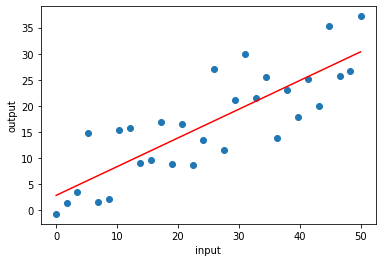

In [25]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions, color="r")
plt.xlabel('input')
plt.ylabel('output')

Let's create some test data:

In [26]:
# Generate 30 random numbers
x_2 = np.linspace(0, 50, 30)
# Random Delta
delta_2 = np.random.uniform(-10, 10, x.size)
test_x = 0.5 * x + 5 + delta
test_y = reg.predict(test_x.reshape(-1,1))

Let's plot the new predictions:

Text(0, 0.5, 'output')

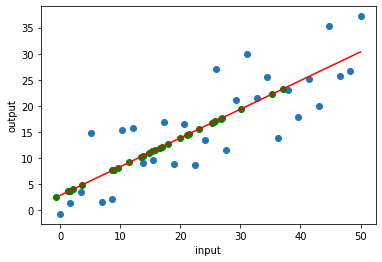

In [27]:
predictions = [(m * x[i]) + b for i in range(len(x))]
plt.scatter(x, y)
plt.scatter(test_x, test_y, color='g')
plt.plot(x, predictions, color="r")
plt.xlabel('input')
plt.ylabel('output')

In this case, our features will be the pixels of the images. However, to use the image input we will need to convert it into a 1-dimensional array with length 64.



<a name="2-2-1"></a>
# Other Linear Regression Models 

Let's see how different linear regression methods finds solutions to the same problem.

## Bayesian Ridge Regression

m:0.5408595735834032 b:3.099947892632283


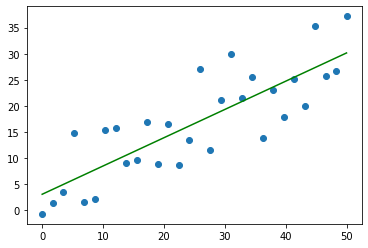

In [28]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(x.reshape(-1, 1), y.reshape(-1, 1))
m2 = bayesian_ridge.coef_[0]
b2 = bayesian_ridge.intercept_
print(f"m:{m2} b:{b2}")
# Let's plot the line that minimise the distance
predictions2 = [(m2 * x[i]) + b2 for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions2, color="g")
plt.show()

# Lasso Regression

m:0.5488538176084578 b:[2.90009179]


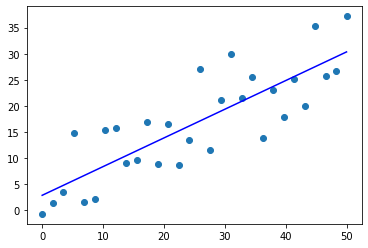

In [29]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(x.reshape(-1, 1), y.reshape(-1, 1))
m3 = lasso.coef_[0]
b3 = lasso.intercept_
print(f"m:{m3} b:{b3}")
# Let's plot the line that minimised the dis
predictions3 = [(m3 * x[i]) + b3 for i in range(len(x))]
plt.scatter(x, y)
plt.plot(x, predictions3, color="b")
plt.show()

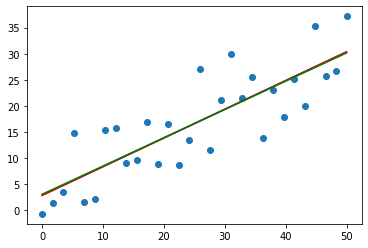

In [30]:
# Let's plot the lines created by the 3 regression models
plt.scatter(x, y)
plt.plot(x, predictions3, color="b")
plt.plot(x, predictions, color="r")
plt.plot(x, predictions2, color="g")
plt.show()

Let's try a regression problem with another example.

Imagine that a teacher in high school is interested to know if there is any correlation in regards to the number of hours their students studied for the final exam and the score they got. For this example, we will assume that the number of hours is the only factor that was collected. In this dataset, every row represents a student with the corresponding number of study hours and the score.

In [31]:
# Let's use pandas to explore the dataset
# Load the dataset
students = pd.read_csv('hours_vs_scores.csv')
students

,Hours,Scores
0,2.1,21
1,4.9,47
2,3.2,27
3,8.3,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Splitting the dataset

Let's split the student's dataset. First, let's split <code>X</code> and <code>y</code>.

In [32]:
# Being X the features (hours)
X = students.iloc[:, 0]
# Being y, what we want to predict (score)
y = students.iloc[:, 1]

In [33]:
# We can specify the percentage for the splitting for test_size. This means that 20% of the data will be used for testing and the rest for training.
# random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2020
)

In [34]:
X_train.shape

(24,)

We need to reshape <code>x</code> and <code>y</code>. The `LinearRegression` API from scikit-learn requires the values for `x` and `y` to be shaped like (num_features, 1).

In [35]:
# Reshape X_train
X_train.values.reshape(-1, 1).shape

(24, 1)

In [36]:
# Train LinearRegression
regressor = linear_model.LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
print(regressor.coef_[0][0])
print(regressor.intercept_[0])

9.36794715527071
4.517487123029149


<a name="2-1-2"></a>
# Making Predictions
Now let's make some predictions. 

**Important Note:** Always use the test set for predictions. You should never use the train data for predictions.

In [37]:
# Use the test dataset for predictions
y_pred = regressor.predict(X_test.values.reshape(-1, 1)).flatten()
y_pred

array([14.82222899, 22.31658672, 73.84029607, 29.81094444, 69.15632249,
       34.49491802])

In [38]:
# Let's compare the actual values with the predictions
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
14,17,14.822229
17,24,22.316587
19,69,73.840296
20,30,29.810944
23,76,69.156322
2,27,34.494918


<div class="alert alert-success">
  <h2>Exercise 4</h2>

  Description:
  
  - Given `actual` and `predicted` calculate the error using `Mean Absolute Error` and `Mean Squared Error`.
 
  <br/>
  <details>
      <summary><b>→ Hints</b></summary>
  - Use `np.abs` and `.mean()` to calculate the `Mean Absolute Error`.
  - Use `np.squared` and `.mean()` to calculate the `Mean Squared Error`. Alternatively you can calculate it like: `((actual-predicted)**2).mean()`
  </details>

  <br/>
  <br/>
  <details>
  <summary>
    <b>→ Solution</b>
  </summary>
    
  ```python
actual = df.iloc[:,0]
predicted = df.iloc[:,1]
mae = np.abs(actual-predicted).mean()
mse = np.square(actual-predicted).mean()
  ```
  </details>

  </div>

<a name="3"></a>
# 3. Unsupervised Learning

According to [Wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning):
> Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In contrast to supervised learning that usually makes use of human-labelled data, unsupervised learning, also known as self-organization allows for modelling of probability densities over inputs.[1] It forms one of the three main categories of machine learning, along with supervised and reinforcement learning. Semi-supervised learning, a related variant, makes use of supervised and unsupervised techniques. 
... Two of the main methods used in unsupervised learning are principal component and cluster analysis.


<a name="3-1"></a>
## 3.1 Clustering <a name="clustering"></a>


Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Sources: [Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)

<a name="3-2"></a>
## 3.2 Principal Component Analysis (PCA) <a name="pca"></a>


PCA is a common tool used in exploratory data analysis and in machine learning for predictive models.
The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the most representative features in the dataset.

Sources: [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

There is a session dedicated to unsupervised learning, we will provide examples of the different techniques mentioned here for clustering and dimensionality reduction.

<a name="4-3"></a>
## Overfitting vs Underfitting

In the image below, we have an example where we want to train a model to create a boundary that separates class 1 (blue points) and class 2 (red points). The green line represents an overfitted model and the black line represents a regularized (able to generalise better) model. While the green line best follows the training data, it is too dependent on that data and it is likely to have a higher error rate on new unseen data, compared to the black line.

<img width=500 height=500 src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/1920px-Overfitting.svg.png' />

Source: [Overfitting Image](https://en.wikipedia.org/wiki/Overfitting#/media/File:Overfitting.svg)
License: [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)


On the other side of the spectrum, we have underfitted models, where the model is too simplistic and does not fit the model properly. The blue dashed line represents an underfitted model. A straight line can never fit a parabola. This model is too simple.

<img width=500 height=500 src='https://upload.wikimedia.org/wikipedia/en/5/5c/Parabola_on_line.png' />


To determine if a model is overfitted or underfitted we will first need to understand how to measure the performance of the model.



## References and further reading
The following sources have been used in the creation of this notebook:
- [One Hot Encoding Examples](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Label Encoding](https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets)
- [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning)
- [Unsupervised Learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Normalisation](https://en.wikipedia.org/wiki/Normalization_(statistics))
- [Overfitting](https://en.wikipedia.org/wiki/Overfitting)
- [SciPy](https://www.scipy.org/)
- [RAPIDS](https://rapids.ai/start.html)
